[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


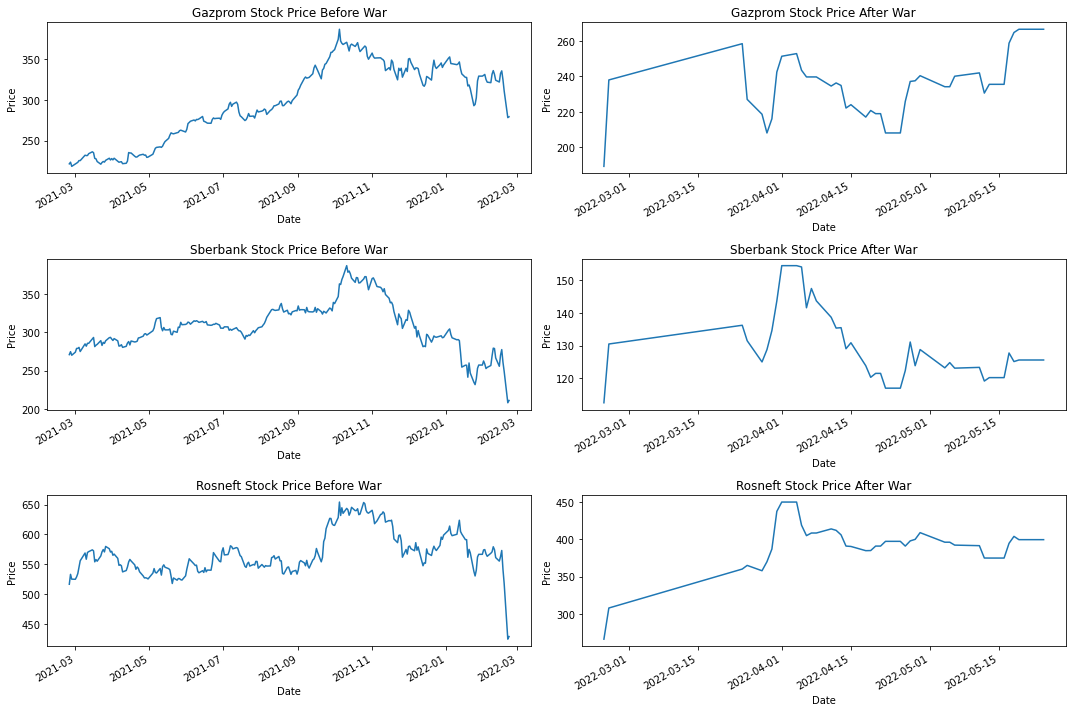


Gazprom:
Volatility before war: 28.22%
Volatility after war: 92.84%

Sberbank:
Volatility before war: 36.53%
Volatility after war: 71.88%

Rosneft:
Volatility before war: 31.80%
Volatility after war: 71.90%


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the companies and their ticker symbols
companies = {
    'Gazprom': 'GAZP.ME',
    'Sberbank': 'SBER.ME',
    'Rosneft': 'ROSN.ME'
}

# Define the periods before and after the Ukrainian war
war_start_date = '2022-02-24'
before_war_period = ('2021-02-24', '2022-02-23')
after_war_period = ('2022-02-24', '2023-02-24')

# Function to calculate daily returns
def calculate_returns(data):
    data['Return'] = data['Close'].pct_change()
    return data

# Function to calculate volatility
def calculate_volatility(returns):
    volatility = returns['Return'].std() * np.sqrt(252)  # Annualize the volatility
    return volatility

# Fetch data, calculate returns and volatility
results = {}

for company, ticker in companies.items():
    try:
        data_before = yf.download(ticker, start=before_war_period[0], end=before_war_period[1])
        data_after = yf.download(ticker, start=after_war_period[0], end=after_war_period[1])

        data_before = calculate_returns(data_before)
        data_after = calculate_returns(data_after)

        volatility_before = calculate_volatility(data_before)
        volatility_after = calculate_volatility(data_after)

        results[company] = {
            'before': {
                'data': data_before,
                'volatility': volatility_before
            },
            'after': {
                'data': data_after,
                'volatility': volatility_after
            }
        }
    except Exception as e:
        print(f"Error fetching data for {company}: {e}")

# Plot stock prices before and after the war
fig, axs = plt.subplots(len(companies), 2, figsize=(15, 10))

for i, (company, result) in enumerate(results.items()):
    result['before']['data']['Close'].plot(ax=axs[i, 0], title=f"{company} Stock Price Before War", xlabel='Date', ylabel='Price')
    result['after']['data']['Close'].plot(ax=axs[i, 1], title=f"{company} Stock Price After War", xlabel='Date', ylabel='Price')

plt.tight_layout()
plt.show()

# Print results
for company, result in results.items():
    print(f"\n{company}:")
    print(f"Volatility before war: {result['before']['volatility']:.2%}")
    print(f"Volatility after war: {result['after']['volatility']:.2%}")
